# 1)Window Aggregate Functions

In this lesson, we'll discuss window aggregate functions. Generally, when we write aggregate queries, the **columns not included** in the `GROUP BY` clause do **not appear in the result set**, and we lose the details. 

The `OVER` clause allows us to add aggregate functions to non-aggregate and even aggregate queries and eliminate the mentioned restriction. Thus, a window aggregate function doesn’t require a `GROUP BY` clause. So we can implement more insightful queries without dealing with the limits of the `GROUP BY` clause.

After you finish this lesson, you'll have a good understanding of the following:

1. What window aggregate functions are

1. How to add window aggregate functions to **non-aggregate queries**

1. How to add window aggregate functions to **aggregate queries**

# 2) What Are Window Aggregate Functions?

Window aggregate functions are the same functions as grouped aggregate functions. One of the differences is how we apply these two classes of functions to a set of rows. When you use an aggregate function with a `GROUP BY` clause, you can compute one result from the group of rows in the result set. However, the window aggregate functions are calculated over a range of rows defined by an `OVER()` clause.

Another difference lies in the output: while grouping gives us results per group, with `OVER()`, we get results for each row.

Let's discover the difference between them with an example.

Consider the following table:

| sales_date | brand   | model                    | quantity |
|------------|---------|--------------------------|----------|
| 2022-01-31 | Samsung | Samsung Galaxy Z Fold4   | 40       |
| 2022-01-31 | Samsung | Samsung Galaxy S22 Ultra | 30       |
| 2022-02-28 | Samsung | Samsung Galaxy S22 Ultra | 35       |
| 2022-03-31 | Samsung | Samsung Galaxy S22 Ultra | 25       |
| 2022-03-31 | Samsung | Samsung Galaxy Z Fold4   | 60       |
| 2022-04-30 | Samsung | Samsung Galaxy Z Fold4   | 25       |
| 2022-05-31 | Samsung | Samsung Galaxy Z Fold4   | 30       |
| 2022-05-31 | Samsung | Samsung Galaxy S22 Ultra | 47       |
| 2022-06-30 | Samsung | Samsung Galaxy Z Fold4   | 76       |

We want to know the total and average quantities of phones sold each month. Let's look at the result of the query below:

```sql
SELECT sales_date, SUM(quantity), AVG(quantity)
  FROM phone_sales_quantity
 GROUP BY sales_date;
```
| sales_date | sum | avg  |
|------------|-----|------|
| 2022-04-30 | 25  | 25   |
| 2022-02-28 | 35  | 35   |
| 2022-06-30 | 76  | 76   |
| 2022-05-31 | 77  | 38.5 |
| 2022-03-31 | 85  | 42.5 |
| 2022-01-31 | 70  | 35   |

As you've seen, with simple aggregates, the only columns allowed in the `SELECT` clause are the aggregate and those columns included in a GROUP BY clause, which means you no longer have access to each sale's quantity contributing to the results. So, if we add the quantity column in the `SELECT` clause, the DBMS yields an error message. 

To handle the issue, you can use window functions to retrieve the underlying data along with the aggregates.



As we learned, the keyword for window functions is the `OVER()` clause. Here is a query that uses an `OVER` clause to fix the previous query's issue.

```sql
SELECT sales_date, brand, model, quantity,
       SUM(quantity) OVER(PARTITION BY sales_date),
       AVG(quantity) OVER(PARTITION BY sales_date)
  FROM phone_sales_quantity;
```

Unlike the query with the `GROUP BY` clause, in the preceding query, we can include additional columns in the `SELECT` clause.

The query above includes four columns of detailed data about each sale and two aggregates. The only difference between these two queries is that we used the `OVER()` clause instead of the GROUP BY clause in the preceding query.

Therefore, the sum and average quantities of phones sold each month returned with detailed data as follows.

| sales_date | brand   | model                    | quantity | sum | avg  |
|------------|---------|--------------------------|----------|-----|------|
| 2022-01-31 | Samsung | Samsung Galaxy Z Fold4   | 40       | 70  | 35   |
| 2022-01-31 | Samsung | Samsung Galaxy S22 Ultra | 30       | 70  | 35   |
| 2022-02-28 | Samsung | Samsung Galaxy S22 Ultra | 35       | 35  | 35   |
| 2022-03-31 | Samsung | Samsung Galaxy S22 Ultra | 25       | 85  | 42.5 |
| 2022-03-31 | Samsung | Samsung Galaxy Z Fold4   | 60       | 85  | 42.5 |
| 2022-04-30 | Samsung | Samsung Galaxy Z Fold4   | 25       | 25  | 25   |
| 2022-05-31 | Samsung | Samsung Galaxy Z Fold4   | 30       | 77  | 38.5 |
| 2022-05-31 | Samsung | Samsung Galaxy S22 Ultra | 47       | 77  | 38.5 |
| 2022-06-30 | Samsung | Samsung Galaxy Z Fold4   | 76       | 76  | 76   |

Although having the aggregates returned for every row doesn't make sense, it allows us to write more valuable queries, like comparing aggregates with detail values, which is only simple with window functions.

## Instructions

Write a query comparing the number of phones sold in each row with the average monthly sales quantity.

1.Run a query against the `phone_sales_quantity` table returning:

* All original columns in the table

* The average daily sales quantity, aliased as `average`

* The difference between the quantity of sold phones and the average daily sales quantity, aliased as `difference`

In [ ]:
%%sql
SELECT *,
       AVG(quantity) OVER(PARTITION BY sales_date) AS average,
       quantity - AVG(quantity) OVER(PARTITION BY sales_date) AS difference
FROM phone_sales_quantity


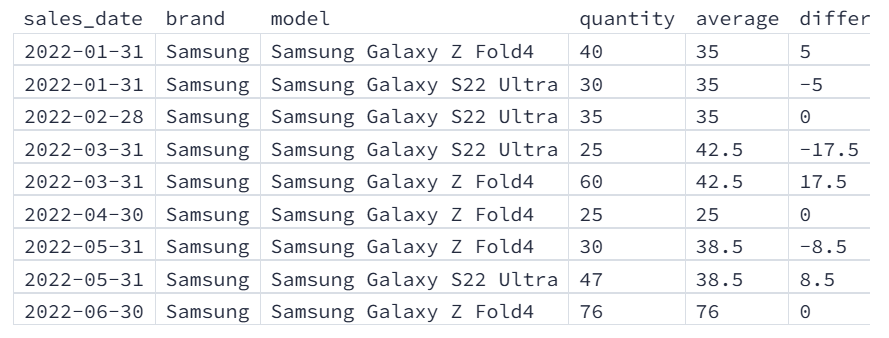

# 3) Using Window Aggregate Functions

Based on standard SQL, window aggregate functions support three main elements:

* Partitioning

* Ordering

* Framing

Here's the general syntax:

```sql
aggregate_function(column_name) OVER(
        [PARTITION BY clause],
        [ORDER BY clause],
        [window framing clause]
        )
```

Although we're already familiar with the window functions syntax and its elements, let's first review the three main elements with a focus on their usage in window aggregate functions before we introduce some helpful window aggregate functions.

* The window **partitioning** element allows us to restrict the window to only those rows with the **same value in the partitioning columns as the current row**.

* The **ordering** element in the window specification is not supported for window aggregate functions and gives meaning to the framing element.

The **framing** element enables us to specify further **which rows are included in an aggregate**. So we can dive into the data section that we're interested in.

The List of Window Aggregate Functions

| Window Aggregate Function | Definition                                                                                       |
|---------------------------|--------------------------------------------------------------------------------------------------|
| SUM(expression)           | Returns the sum of the rows from expression as viewed by the OVER clause.                        |
| AVG(expression)           | Returns the average of expression as viewed by the OVER clause.                                  |
| MIN(expression)           | Finds the minimum value in a column given by expression as viewed by the OVER clause.            |
| MAX(expression)           | Returns the highest value in a column given by expression as viewed by the OVER clause.          |
| COUNT(expression)         | Returns a count of the number of non-NULL values of the expression as viewed by the OVER clause. |
| VARIANCE(expression)      | Returns the variance of all expression values as viewed by the OVER clause.                      |
| STDDEV(expression)        | Returns a sample standard deviation of all expression values as viewed by the OVER clause.       |

Let's assume we're interested in each department's highest and lowest salaries. To write a query that returns the mentioned information, we require a `PARTITION BY` clause, as follows:

```sql
SELECT last_name, department, salary,
       MAX(salary) OVER(PARTITION BY department) as max_salary,
       MIN(salary) OVER(PARTITION BY department) as min_salary
  FROM employees;
```

| last_name | department | salary    | max_salary | min_salary |
|-----------|------------|-----------|------------|------------|
| Mitchell  | IT         | 89900.00  | 89900      | 67800      |
| Edward    | IT         | 75900.00  | 89900      | 67800      |
| Callahan  | IT         | 78000.00  | 89900      | 67800      |
| King      | IT         | 67800.00  | 89900      | 67800      |
| Adams     | Management | 108000.00 | 108000     | 108000     |
| Johnson   | Sales      | 76500.00  | 98900      | 69800      |
| Park      | Sales      | 69800.00  | 98900      | 69800      |
| Peacock   | Sales      | 87000.00  | 98900      | 69800      |
| Edwards   | Sales      | 98900.00  | 98900      | 69800      |


## Instructions

A table called `phone_sales_by_month` contains sales data for two different phone brands. You want to analyze the **revenue generated by each brand** and view it in different ways to identify trends more accurately.

Write a query that returns the following:

* All original columns in the table

* The running average sales revenue for each phone brand separately, aliased as `running_average`

* The rolling three-month average sales revenue for each phone brand separately (use the previous two months and the current month), aliased as three_month_average

Note that revenue is calculated by multiplying `quantity` by `unit_price`.
